# Case 1: Computation on value graph for vINCI

1. Martin Molan
1. Gregor Molan

+ 2021-05-16
+ 2021-06-30 .. layer -> subgraph
+ 2021-07-03 .. vINCI
+ 2022-07-20 .. new build with new Keras, Tensorflow (need nightly build), Keract, Matplotlib
```
conda install keras
conda install tensorflow
pip install keract
pip install matplotlib
pip install tf-nightly
jupyter notebook Value_graph_vINCI.1.ipynb
```
+ 2022-07-21
    * Sort functionality risk estimation by 90 % of trade-off function : `lst_loss_percentage`
    * Correctly plot results - use 5 backend items and final value: `for i in range(0,6):`

+ 2023-01-05
  * Tested on https://colab.research.google.com/
+ 2023-01-11
  * Public available code
  * Strict variable naming (see %whos)

## Prerequisites

### Install

In [1]:
#!pip install keras
#!pip install tensorflow
!pip install keract
#!pip install matplotlib
#!pip install tf-nightly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import

In [2]:
import keras;
#   from keras.layers import Activation, Concatenate, Dense, Input, Layer
#   from keras.models import Model
#   from keras.utils.vis_utils import plot_model;

# import keract; 
from keract import get_activations as f_keract_get_activations;
from keract import get_gradients_of_activations as f_keract_get_gradients_of_activations;

import numpy as m_np
import tensorflow as m_tf

import matplotlib.pyplot as m_plt;
import matplotlib.gridspec as m_gridspec;

## Value graph definition

### Definition of model topology

In [3]:
#
# Class for merging Requirement and Backend functionality layers
#
class class_requ_back(keras.layers.Layer):
    def __init__(self, units=32, input_dim1=32,
               input_dim2=32):
        super(class_requ_back, self).__init__()

        # Var. for weights for requirement signal
        # is defined as "trainable variable".
        # Generate initialized tensors.
        w_init1 = m_tf.ones_initializer()
        self.requirements_variable = m_tf.Variable(
            initial_value = w_init1(
                shape=(input_dim1, units),
                dtype="float32"),
            trainable=True
        )

        # Variable for weights for backend signal
        # is defined as "trainable variable"
        w_init2 = m_tf.random_normal_initializer()
        self.backend_variable = m_tf.Variable(
            initial_value = w_init2(
                shape=(input_dim2, units),
                dtype="float32"),
            trainable=True
        )

        # Bias need to be defined if use it or not
        bias_init = m_tf.random_normal_initializer()
        self.my_dummy_bias = m_tf.Variable(
            initial_value = bias_init(
                shape=(units,),dtype="float32"),
            trainable=True
        )
    
    def call(self, inputs):
        # Multiplies input vector `input_req`
        # by matrix requirements_variable 
        requirement_matrix = m_tf.matmul(
            inputs[0],
            self.requirements_variable)

        # Multipliesn input vector `input_backend` 
        # by matrix requirements_variable 
        backend_matrix = m_tf.matmul(
            inputs[1], self.backend_variable)

        requirement_and_backend = (
            requirement_matrix 
            - requirement_matrix * backend_matrix 
            + self.my_dummy_bias
        )
#        print("Matrices in class class_requ_back:")
#        print("---------------------------")
#        print(requirement_matrix, "  \t= requirement_matrix")
#        print(backend_matrix, "\t= backend_matrix")
#        print(requirement_and_backend, "    \t= requirement_and_backend")
    
        return requirement_and_backend

### Definition of input parameters (graph edge weights)

In [4]:
#
# Graph arch values for arcs
# from requirement layer to core functionality layer
#
ndarr_w_R_0_1 = m_np.array([
    [0.1, 0.2, 0.2, 0.5],
    [  0, 0.4, 0,   0.6],
    [0.7, 0.3, 0,   0  ],
    [  0, 0.3, 0.3, 0.4]
]);
ndarr_bias_r = m_np.array([0., 0., 0., 0.])
#
# Graph arch values for arcs
# from backend functionality layer to core functionality layer
#
ndarr_w_B_0_1 = m_np.array([
    [ 0.6,  0.4, 0,   0  ],
    [ 0.6,  0.6, 0.8, 0.8],
    [ 0.1,  0.1, 0.9, 0  ],
    [ 0,    0,   0,   0.8],
    [ 1,    1,   1,   1  ]
]);
ndarr_bias_b = m_np.array([0., 0., 0., 0.])

#
# Graph arch values for arcs
# from core functionality layer and edge functionality layer
#
ndarr_w_1_2 = m_np.array([
    [0.05, 0.00, 0.95],
    [0.3,  0.3,  0.4],
    [0.4,  0.0,  0.6],
    [0.3,  0.0,  0.7]
]);


#
# Bias for Edge functionality layer
#
ndarr_bias_Edge = m_np.array([
    0,
    0,
    0
]);

#
# Graph arch values for arc
# from edge functionality layer and value layer
#
ndarr_w_2_3 = m_np.array([
    [0.8],
    [0.5],
    [  1]
]);

#
# Bias for Value layer
#
ndarr_bias_value = m_np.array([
    0
]);

lst_model_weights = [
   ndarr_w_R_0_1,
   ndarr_bias_r,
   ndarr_w_B_0_1,
   ndarr_bias_b,
   ndarr_w_1_2,
   ndarr_bias_Edge,
   ndarr_w_2_3,
   ndarr_bias_value
]

In [5]:
%whos

Variable                                Type        Data/Info
-------------------------------------------------------------
class_requ_back                         type        <class '__main__.class_requ_back'>
f_keract_get_activations                function    <function get_activations at 0x7f566510d310>
f_keract_get_gradients_of_activations   function    <function get_gradients_o<...>ations at 0x7f5665105ca0>
keras                                   module      <module 'keras' from '/us<...>kages/keras/__init__.py'>
lst_model_weights                       list        n=8
m_gridspec                              module      <module 'matplotlib.grids<...>/matplotlib/gridspec.py'>
m_np                                    module      <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
m_plt                                   module      <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
m_tf                                    module      <module 'tensorflow' from<...>/tensorflow/__

### Definition of input variables

In [6]:
#
# Input variables in vectors for Requirements (r_R) and Bias (r_B)
#
r_R = m_np.array([[0.4,0.133,0.2,0.267]]);
r_B = m_np.array([[0,0,0,0,0]]);

### Custom activation function

In [7]:
#
# NOTE: fl_gl_percentage is global variable!
#
def f_tradeoff(x):
    n = 1 / (1-fl_gl_percentage);
    y = x - x**n/n;
    return(y)

### Definition of learning rate

In [8]:
#
# Definition of learning rate for "Gradient descent (with momentum) optimizer"
#
fl_learning_rate = 0.01;

### Setup the model

In [9]:
#
# Input:
#  fl_gl_percentage
#  lst_model_weights

# input global variable 
#  fl_gl_percentage ... percentage in activation function

# global variables used for setup custom layer names of the model 
str_relu_activ_f_name = 'relu_activ';   
str_tradeoff_activ_f_name = 'tradeoff_activ';
str_output_name = 'output_subgraph';
str_edge_name  = 'edge_subgraph';

#
# Input parameters
#  lst_model_weights ... graph edge weights, topology of the model
#
# Return
#  Keras Model class
#
def f_setup_model(lst_model_weights):
    
    # Following variables can have arbitrary values (but distinguish)
    #   for custom layer names of the model
    requ1_name = 'requirement_subgraph_0';
    requ2_name = 'requirement_subgraph_1';
    back1_name = 'backend_subgraph_0';
    back2_name = 'backend_subgraph_1';
    
    # --- Model definition ---
    # Define two sets of input layers
    input_req = keras.layers.Input(shape=(4,),name=requ1_name);
    dense_req = keras.layers.Dense(4, name='req_dense')(input_req)



    input_backend = keras.layers.Input(shape=(5,), name = back1_name);
    dense_backend = keras.layers.Dense(4, name ='back_dense')(input_backend)

    # Define Core layer
    # Core layer consists of 'requ_back',
    #    (where name is inherited from class class_requ_back),
    # relu activation function (str_relu_activ_f_name)
    # and our custom trade-off function (str_tradeoff_activ_f_name).
    #requ_back = class_requ_back(4, 4, 5)([input_req,input_backend]);
    

    layer_f = keras.layers.Multiply()([dense_req,dense_backend])
    
    layer_ff = keras.layers.subtract([dense_req,layer_f])

    #input_relu = keras.layers.Activation(
    #                                     'relu',
    #                                      name=str_relu_activ_f_name
    #                                    )(layer_ff);
    core = keras.layers.Activation(
                                   f_tradeoff,
                                   name=str_tradeoff_activ_f_name
                                  )(layer_ff);

    # Define Edge layer
    edge = keras.layers.Dense(3, name = str_edge_name)(core);
    
    # Define Value layer
    output = keras.layers.Dense(1, name = str_output_name)(edge)

    # --- Model compile ---
    my_model = keras.models.Model(
        inputs=[input_req, input_backend],
        outputs=output
    )
    my_optimizer = keras.optimizers.SGD(learning_rate=fl_learning_rate)
    my_model.compile(optimizer=my_optimizer, loss='mse');
    
    # --- Set model weights ---
    my_model.set_weights(lst_model_weights);
    
    return(my_model);        

In [10]:
#
# To use f_keract_get_gradients_of_activations in computing gradients
# we should disable TF eager mode 
#
m_tf.compat.v1.disable_eager_execution()

## Value graph operations

### Calculation of value graph

In [11]:
#
# Setup the model 'fnal_value_graph_model' 
# with given 'percentage' for activation function
#
fl_gl_percentage = 0.8;
fnal_value_graph_model = f_setup_model(lst_model_weights);

In [12]:
fnal_value_graph_model.predict([r_R, r_B])

/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2067: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


array([[0.90288174]], dtype=float32)

### Compute gradients

In [13]:
#
# Compute dictionary of gradients: d_grad
#

#
# Prerequisites:
# r_R, r_B ... defined in previous cells
#

# y value for f_keract_get_gradients_of_activations
my_y = m_np.array([[0]]);

# Output d_grad is a dictionary of gradients mapping each layer
# to the values of its gradients (regarding [r_R, r_B] and my_y).
d_grad = f_keract_get_gradients_of_activations(
        fnal_value_graph_model, 
        [r_R, r_B],
        my_y,
        output_format='simple');

In [14]:
d_grad

OrderedDict([('req_dense',
              array([[1.7858292, 1.4185945, 1.6602111, 1.6595005]], dtype=float32)),
             ('back_dense',
              array([[-0.32144928, -0.38770187, -0.26579982, -0.6415629 ]],
                    dtype=float32)),
             ('multiply',
              array([[-1.7858292, -1.4185945, -1.6602111, -1.6595005]], dtype=float32)),
             ('subtract',
              array([[1.7858292, 1.4185945, 1.6602111, 1.6595005]], dtype=float32)),
             ('tradeoff_activ',
              array([[1.7877059, 1.4265532, 1.6613026, 1.6974176]], dtype=float32)),
             ('edge_subgraph',
              array([[1.4446108 , 0.90288174, 1.8057635 ]], dtype=float32)),
             ('output_subgraph', array([[1.8057635]], dtype=float32))])

In [15]:
print("Edge funtionality gradients:",
      m_np.round(d_grad[str_edge_name], 2))

Edge funtionality gradients: [[1.44 0.9  1.81]]


### Print model information

In [16]:
#
# Print a string summary about the content of built model
#
fnal_value_graph_model.summary();

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 requirement_subgraph_0 (InputL  [(None, 4)]         0           []                               
 ayer)                                                                                            
                                                                                                  
 backend_subgraph_0 (InputLayer  [(None, 5)]         0           []                               
 )                                                                                                
                                                                                                  
 req_dense (Dense)              (None, 4)            20          ['requirement_subgraph_0[0][0]'] 
                                                                                              

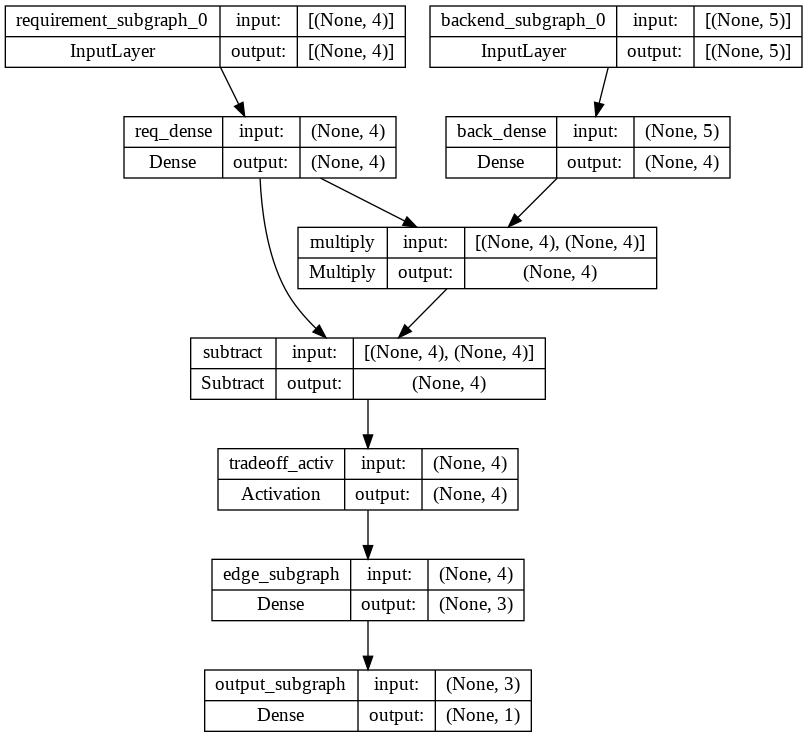

In [17]:
#
# Visulize the built model in 'fnal_value_graph_model'
#
keras.utils.plot_model(
    fnal_value_graph_model,
    show_shapes=True,
    show_layer_names=True, 
    rankdir = 'fl_learning_rate',
    to_file = 'graph_value.pdf'
)

# print to Jupyter notebokk
keras.utils.plot_model(fnal_value_graph_model,
           show_shapes=True, 
           show_layer_names=True,
           rankdir = 'fl_learning_rate'
)

### Functionality risk estimation

In [18]:
#
# Computation of the Functionality risk
#
# Functionality risk is an estimated decrease in software product value,
# if a certain backend functionality is not implemented.
#

lst_requirement_name = [
    'Quality of life',
    'Cardial',
    'Posture',
    'Activity'
];
lst_back_names = [
    'Without smart shoes', 
    'Without smart watch', 
    'Without smart phone', 
    'Without O2 detector',
    'Without cloud infrastructure'
];

def f_loss_value(fnal_value_graph_model, r, i_array):
    return(f_keract_get_activations(
        fnal_value_graph_model,
        [r, m_np.array([i_array])]
    ));

#
# Input global variable: fl_gl_percentage
#
def f_print_final_value_percentage(lst_loss_percentage):
    level_0_names = [lst_requirement_name, lst_back_names]; 
    # we are eliminating only bavckend functionalities
    level_0_names = [lst_back_names];
    
    # set up the model 'fnal_value_graph_model' 
    fnal_value_graph_model = f_setup_model(lst_model_weights);
    
    # get str_output_name value without str_output_name type
    print("{:.2f}".format(f_loss_value(fnal_value_graph_model, 
                                     r_R,
                                     [0]*5)[str_output_name][0][0] 
                         ),
          ': Final value with all backend functionalities'
         );

    for level_0_functionality in range(0,len(level_0_names)):
        j = int(10 * fl_gl_percentage );
        
        lst_loss_percentage[0][j] = round(
            f_loss_value(fnal_value_graph_model,
                       r_R,
                       [0]*5
                      )[str_output_name][0][0],
            2
        );

        lst_loss_percentage[0][0] = 'Implemented ALL';
    
        for i in range(0,len(level_0_names[level_0_functionality])):
            funct_array    = [0]*len(level_0_names[level_0_functionality]);
            funct_array[i] = 1;
            
            # get name of backend functionality
            lst_loss_percentage[i+1][0] = level_0_names[
                                                level_0_functionality
                                            ][i];
            
            # get str_output_name value without str_output_name type
            lst_loss_percentage[i+1][j] = round(
                f_loss_value(fnal_value_graph_model,
                           r_R,
                           funct_array
                          )[str_output_name][0][0],
                2
            );
            print('  ',
                  # get str_output_name value without str_output_name type
                  "{:.2f}".format( 
                      f_loss_value(fnal_value_graph_model,
                                 r_R,
                                 funct_array
                                )[str_output_name][0][0] 
                  ),
                  ':',
#                  'Without',
                  lst_loss_percentage[i+1][0],
                );

In [19]:
#
# Compute and print risk estimations for percentages from 10% to 90%
#

# initialize 'lst_loss_percentage'
lst_loss_percentage = [[0 for i in range(10)] for j in range(6)];

# Note: fl_gl_percentage is global!
for j in range(0,9):
    fl_gl_percentage = (j+1)/10
    # Write values
    print("\n{:n}% : defined percentage for trade off function".
          format( fl_gl_percentage*100 )
    );
    print("-"*45);
    
    # fl_gl_percentage is parameter defined as GlOBAL variable
    f_print_final_value_percentage(lst_loss_percentage); 


10% : defined percentage for trade off function
---------------------------------------------
0.20 : Final value with all backend functionalities
   0.17 : Without smart shoes
   0.08 : Without smart watch
   0.16 : Without smart phone
   0.16 : Without O2 detector
   0.00 : Without cloud infrastructure

20% : defined percentage for trade off function
---------------------------------------------
0.38 : Final value with all backend functionalities
   0.31 : Without smart shoes
   0.15 : Without smart watch
   0.31 : Without smart phone
   0.29 : Without O2 detector
   0.00 : Without cloud infrastructure

30% : defined percentage for trade off function
---------------------------------------------
0.54 : Final value with all backend functionalities
   0.44 : Without smart shoes
   0.20 : Without smart watch
   0.44 : Without smart phone
   0.40 : Without O2 detector
   0.00 : Without cloud infrastructure

40% : defined percentage for trade off function
---------------------------------

In [20]:
#
# Summary about functionality risk estimation
#
lst_loss_percentage

[['Implemented ALL', 0.2, 0.38, 0.54, 0.67, 0.78, 0.85, 0.89, 0.9, 0.9],
 ['Without smart shoes', 0.17, 0.31, 0.44, 0.54, 0.62, 0.67, 0.7, 0.71, 0.71],
 ['Without smart watch', 0.08, 0.15, 0.2, 0.23, 0.25, 0.26, 0.26, 0.26, 0.26],
 ['Without smart phone', 0.16, 0.31, 0.44, 0.54, 0.63, 0.68, 0.72, 0.73, 0.73],
 ['Without O2 detector', 0.16, 0.29, 0.4, 0.49, 0.55, 0.59, 0.61, 0.61, 0.61],
 ['Without cloud infrastructure', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

In [21]:
#
# Sort functionality risk estimation by 90 % of trade-off function
#
lst_loss_percentage.sort(
    reverse=True,
    key=lambda tradeoff90: tradeoff90[9]
)
lst_loss_percentage

[['Implemented ALL', 0.2, 0.38, 0.54, 0.67, 0.78, 0.85, 0.89, 0.9, 0.9],
 ['Without smart phone', 0.16, 0.31, 0.44, 0.54, 0.63, 0.68, 0.72, 0.73, 0.73],
 ['Without smart shoes', 0.17, 0.31, 0.44, 0.54, 0.62, 0.67, 0.7, 0.71, 0.71],
 ['Without O2 detector', 0.16, 0.29, 0.4, 0.49, 0.55, 0.59, 0.61, 0.61, 0.61],
 ['Without smart watch', 0.08, 0.15, 0.2, 0.23, 0.25, 0.26, 0.26, 0.26, 0.26],
 ['Without cloud infrastructure', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

## Presenting results

### Plot loss values according to skipped items from Backend functionality layer

Implemented ALL
Without smart phone
Without smart shoes
Without O2 detector
Without smart watch
Without cloud infrastructure


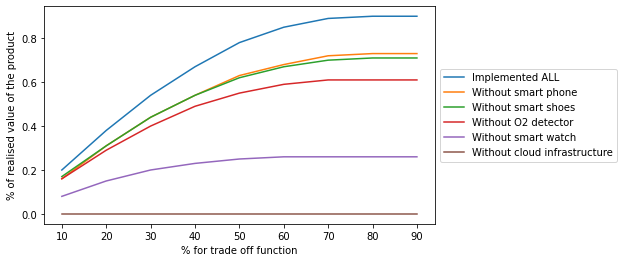

In [22]:
#
# Plot results form 'Risk estimation' computations
#

# define plot size to place legend in the figure during 'savefig'
m_plt.figure(figsize=(7,4));

lst_back_names = [];
for i in range(0,6):
    print(lst_loss_percentage[i][0]);
    lst_back_names.append(lst_loss_percentage[i][0]);
    m_plt.plot([*range(10,100,10)], lst_loss_percentage[i][1:10]);

# put legend outside a plot
fl_legend_y = 0.5;
m_plt.ylabel('% of realised value of the product');
m_plt.xlabel('% for trade off function');
m_plt.legend(lst_back_names, loc='center left', bbox_to_anchor=(1, fl_legend_y))

# bbox_inches = 'tight' : try to figure out the tight bbox of the figure
m_plt.savefig('value_retained-right-legend.pdf', bbox_inches = 'tight');

## Additional/Optional information

### About activation function

Requirements for activation function $y()$ defined as Python function ```f_tradeoff()```
1. $y(0) = 0  $
1. $y'(0) = 1 $
1. $y(x) \le x, \; x \in [0,1] $
1. $y(1) = percentage $

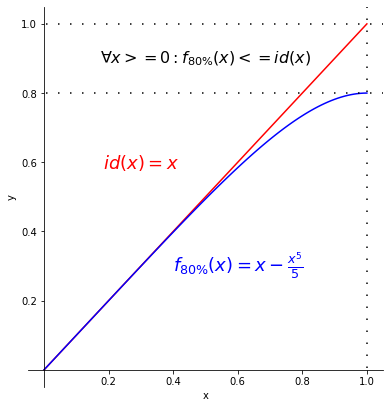

In [23]:
#
# Plot for the 'f_tradeoff' activation function
#

fig = m_plt.figure(figsize=(14,7));
gridSpec_grid = m_gridspec.GridSpec(nrows=1, ncols=2);

# 100 linearly spaced numbers
x = m_np.linspace(0,1,100);

# setting the axes at the centre

axes_plot = fig.add_subplot(gridSpec_grid[0, 1]);
axes_plot.spines['left'].set_position('zero');
axes_plot.spines['bottom'].set_position('zero');
axes_plot.spines['right'].set_color('none');
axes_plot.spines['top'].set_color('none');
#axes_plot.xaxis.set_ticks_position('bottom');
#axes_plot.yaxis.set_ticks_position('left');

# axes name
axes_plot.set_xlabel('x')
axes_plot.set_ylabel('y')

# plot the indentiy function red
y0 = x;
m_plt.plot(x,y0, 'r');

m_plt.text(0.5,0.9,
         r'$\forall x >= 0: f_{80\%}(x) <= id(x)$',
         horizontalalignment='center',verticalalignment='center', fontsize=16, 
#         math_fontfamily='cm'
         );

m_plt.text(0.3,0.6,
         r'$id(x) = x$',color='red',
         horizontalalignment='center',verticalalignment='center', fontsize=18, 
#         math_fontfamily='cm'
         );

m_plt.text(0.6,0.3,
         r'$f_{80\%}(x) = x - \frac{x^5}{5}$',color='blue',
         horizontalalignment='center',verticalalignment='center', fontsize=18, 
#         math_fontfamily='cm'
         );

# plot the 80% f_tradeoff function function blue
fl_gl_percentage = 0.8;
y1 = f_tradeoff(x);
m_plt.plot(x,y1, 'b');

m_plt.xticks(m_np.arange(0.2, 1.1, step=0.2));  # Set label locations.
m_plt.yticks(m_np.arange(0.2, 1.1, step=0.2));  # Set label locations.

m_plt.axvline(x=1, ymin=0.05, color='k', linestyle=(0, (1, 7)));
m_plt.axhline(y=1, xmin=0.05, color='k', linestyle=(0, (1, 7)));
m_plt.axhline(y=0.8, xmin=0.05, color='k', linestyle=(0, (1, 7)));

#m_plt.tight_layout();
m_plt.savefig('activation-function.pdf', bbox_inches = 'tight')